<a href="https://colab.research.google.com/github/lzchungYahoo/test/blob/main/mnist%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST手寫數字辨識 探索式微專題**<br><br>
MNIST 是 **Modified National Institute of Standards and Technology database** 的縮寫。<br>




![markdown](
https://raw.githubusercontent.com/lzchungYahoo/test/master/minist.png
)


MNIST 資料集中包含 2 個部分，分別為**訓練資料 (Training data)**以及**測試資料(Testing data)**。<br>

![markdown](
https://raw.githubusercontent.com/lzchungYahoo/test/master/handwritting.png
)

**1 讀入套件**

In [ ]:
! pip install gradio   # 安裝圖形化的介面套件

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
! pip install tensorflow  # 安裝TensorFlow 套件

In [ ]:
# 數據分析/畫圖 套件
import pandas as pd  # 資料表
import numpy  as np  # 陣列
import matplotlib.pyplot as plt  # 畫圖
import seaborn as sns  # 畫圖


# 神經網路套件
import tensorflow as tf
from   tensorflow.keras.datasets import mnist
from   tensorflow.keras.utils import to_categorical
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Dense, Dropout
from   tensorflow.keras.optimizers import SGD

# Webapp 圖形化介面套件
import gradio as gr

# 互動設計用
from ipywidgets import interact_manual

**2 載入手寫圖片資料**

In [ ]:
((train_images, train_labels),(test_images, test_labels)) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

# 觀察Training data/Testing data 的筆數

# print( train_images[0] )
# print( train_labels[0] )

print( f"訓練資料 (Trainning data) 筆數={train_images.shape}")
print( f"測試資料 (Testing data)   筆數={test_images.shape} ")

訓練資料 (Trainning data) 筆數=(60000, 28, 28)
測試資料 (Testing data)   筆數=(10000, 28, 28) 


**3 輸出手寫圖片**

In [ ]:
train_images[20000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  19,  29, 216, 254, 254, 167,   9,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  53, 197, 220, 220, 253, 253, 253, 253, 163,   9,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 100, 148, 236, 253, 253, 253, 232, 154, 154, 154, 228, 125,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 243, 243, 243,
        250, 253, 253, 254, 248, 231, 222,  47,   0,   0,   0,   8,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 157, 253, 253, 253,
        253, 236, 150, 136,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 243, 253, 253, 172,
        165,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  92, 253, 253, 211,  11,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 167, 253, 253,  98,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  21, 223, 253, 253, 202, 188,
        188, 154, 174, 189, 159,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 163, 253, 253, 253, 253, 253,
        253, 253, 253, 254, 253, 227, 221, 125,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178, 254, 254, 254, 254, 254,
        254, 244, 236, 241, 254, 254, 254, 230,  46,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100, 253, 253, 239, 187, 187,
        120,  54,  34,  44,  77, 121, 251, 253, 188,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 135,  48,  34,   0,   0,
          0,   0,   0,   0,   0,   0, 243, 253, 253,  22,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  53, 249, 253, 207,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 100, 128,   0,   0,   0,
          0,   0,   0,   0,   0, 172, 253, 241, 129,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  65, 237, 219,  79,   0,   0,   0,
          0,   0,   0,  12, 166, 244, 253, 159,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 245, 253, 154,   0,   0,   0,   0,
          0,   9,  60, 236, 253, 253, 248,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 254, 253, 171,  45,  45,  84, 155,
        155, 228, 253, 255, 253, 253, 121,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 221, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 254, 199,  85,  32,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  82,  95, 143,  95, 167, 253, 205,
        234,  61,  33,  33,  10,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
test_images[500]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  44,  47,  28, 116, 153, 254,
        255, 195, 115,  42,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  67, 121, 241, 253, 188, 253, 253, 253,
        253, 253, 253, 234,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  91, 249, 253, 253, 253, 253, 245, 248, 246,
        189, 224, 253, 253, 239,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  94, 253, 253, 253, 253, 208,  51,  59,  94,
         26,  43, 253, 253, 158,   9,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   8, 220, 247,  81,  93,  23,   0,   0,   0,
          0,  95, 253, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57,   6,   0,   0,   0,   0,  15,
         73, 219, 253, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 229,
        253, 253, 253, 252, 206,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 253,
        253, 253, 253, 222,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 253,
        253, 253, 253, 248,  97, 110, 110,  61,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 233,
        253, 253, 253, 253, 253, 253, 253, 203,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
         51, 169, 253, 253, 253, 253, 253, 251,  75,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   5, 157, 242, 253, 253, 253,  93,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 139, 253, 253, 253,  93,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   4, 148, 253, 253, 235,  44,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 137, 253, 253, 253,  65,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  21,
         21,  81, 203, 252, 253, 253, 220,  18,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  35, 140, 171, 129, 207, 253,
        253, 253, 253, 253, 253, 253, 158,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  38, 185, 253, 253, 253, 253, 253,
        253, 253, 250, 252, 243, 192,  46,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  65, 249, 253, 253, 253, 252, 196,
        242, 154,  86, 119,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

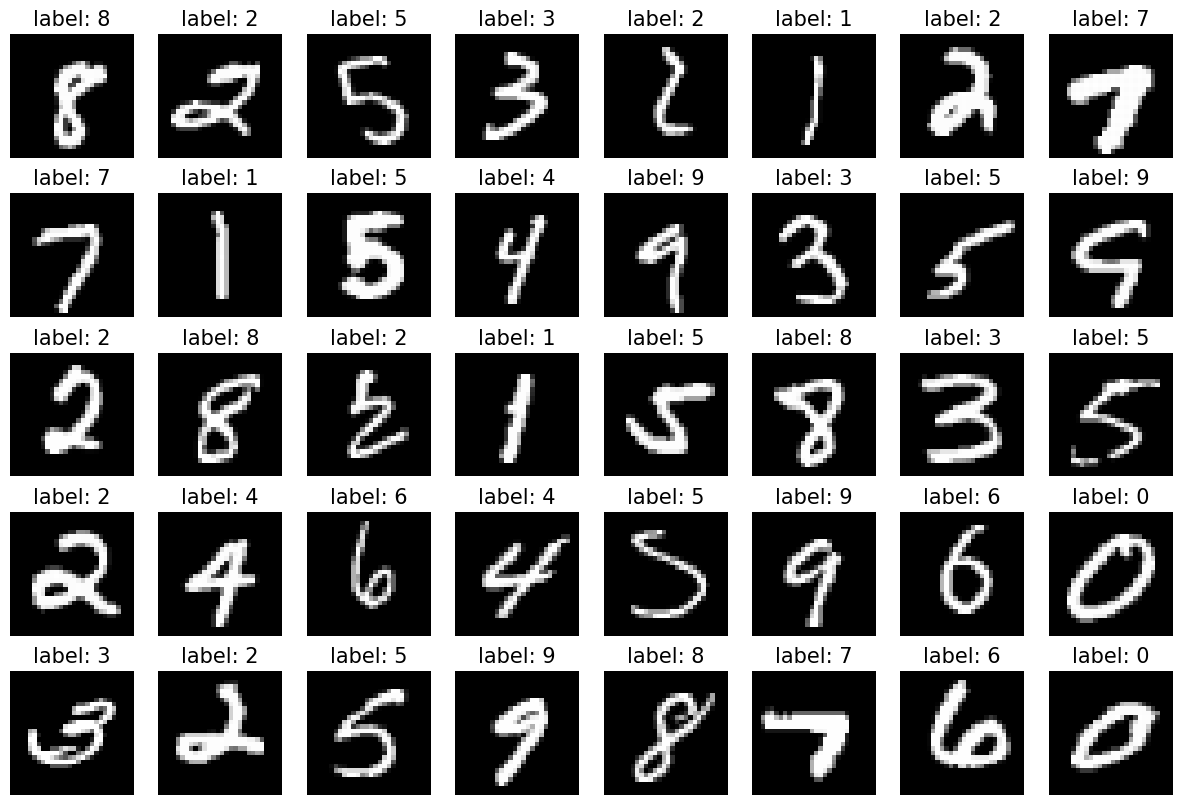

In [ ]:
from random import randrange

# plt.gcf().set_size_inches(15, 10) #設定圖形的寬高
plt.figure(figsize=(15, 10))

for i in range(5):
  for j in range(8):
    index = randrange(0, 60000)
    plt.subplot(5, 8, i*8+j+1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title( f'label: {train_labels[index]}', fontsize=15 )
    plt.axis('off')

plt.show()

In [ ]:
def show_xy(n=0):
  plt.imshow(train_images[n], cmap='gray')
  plt.title( f'label: {train_labels[n]}', fontsize=15 )
  plt.axis('off')
  plt.show()

interact_manual(show_xy, n=(0, 59999))


interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

<function __main__.show_xy(n=0)>

**4 資料預先處理 (Preprocess)** <br>
step1: 將 28x28 的 **二維資料** 轉成 **一維向量** <br>
Step2: 接續Step1, 將一維向量的資料正規化至0~1 <br>

In [ ]:
x_train = train_images.reshape( 60000, 28*28 )

x_train = x_train.astype('float32') / 255

# print(x_train.shape)
# print(x_train[0])

#--------------------------------------------

x_test = test_images.reshape( (10000, 784) )
x_test = x_test.astype('float') / 255

# print(x_test.shape)
# print(x_test[0])

![markdown](
https://raw.githubusercontent.com/lzchungYahoo/test/master/one-hot-encoding.png
)

**將標籤做 One-hot 編碼:** <br>
將數字 0 到數字 9 (這 10 種類別) 分別用一維向量來編碼表示，稱為 One-Hot Encoding。

In [ ]:
# 預先處理標籤資料

from keras.utils import to_categorical

# one-hot 編碼: 比如5, 放在分10類內,
# array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

y_train = to_categorical(train_labels)  # 將標籤做 One-hot 編碼
y_test  = to_categorical(test_labels)   # 將測試做 One-hot 編碼

In [ ]:
print( train_labels[20000] )

print( y_train[20000] ) # 數字5

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print( test_labels[500] )

print( y_test[500] ) # 數字3

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**建立與編譯模型**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential()  # 建立一個空的順序神經網路叫 sequential



In [ ]:
'''
N1 = 512 # 第一層神經元個數
N2 = 10  # 第二層神經元個數
'''

#  自己試試看調整N1, N2, N3(不要調正)
N1 = 20   # 可以自行調整
N2 = 20   # 可以自行調整
N3 = 20   # 可以自行調整
N4 = 10   # 固定輸出分類


# Dense: 就是全連結形式

model.add( Dense( N1, activation='relu', input_dim=784)  )  # 加入輸入層(含隱藏層第一層)

model.add( Dense( N2, activation='relu')  )                 # 加入隱藏層第二層

model.add( Dense( N3, activation='relu')  )                 # 加入隱藏層第二層

# model.add( Dropout(0.2))                                  # 20%dropout (避免overfitting)

model.add( Dense( N4, activation='softmax' ))               # 加入輸出層 (最後這一層不要動)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# # Method 1
model.compile( optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy']
             )

In [ ]:
# Method 2
# model.compile( optimizer=SGD(learning_rate=0.1),
#                loss='mse',
#                metrics=['accuracy']
#              )

In [ ]:
model.summary()  # 784*512 + bais(512) = 401920,  512*10 + 10 = 5130

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,750 (65.43 KB)

 Trainable params: 16,750 (65.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(y_train.shape)


(60000, 10)


訓練模型 利用 x_train (訓練樣本) + y_train (正確答案 標籤 )

Keras會將樣本分成一小批一小批 來訓練, batch_size=100, 每次取100個樣本來訓練。epochs 指定訓練週期, 將所以資料都訓練一遍就是一個週期,  因此將全部60000個樣本重複訓練20次。

In [ ]:
history = model.fit( x_train, y_train, epochs=20, batch_size=100, validation_split=0.2)    # epochs(訓練週期), batch_size=100 每一次取128樣本來訓練
                                                                  # 60000/100 = 600  共分600組
                                                                  # verbose=1 預設輸出結果


Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6292 - loss: 1.1752 - val_accuracy: 0.9102 - val_loss: 0.3267
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9080 - loss: 0.3267 - val_accuracy: 0.9300 - val_loss: 0.2559
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9244 - loss: 0.2597 - val_accuracy: 0.9340 - val_loss: 0.2312
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9364 - loss: 0.2214 - val_accuracy: 0.9405 - val_loss: 0.2110
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9384 - loss: 0.2122 - val_accuracy: 0.9427 - val_loss: 0.2053
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9452 - loss: 0.1891 - val_accuracy: 0.9488 - val_loss: 0.1882
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9485 - loss: 0.1726 - val_accuracy: 0.9511 - val_loss: 0.1795
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9539 - loss: 0.1600 - val_accuracy: 0.

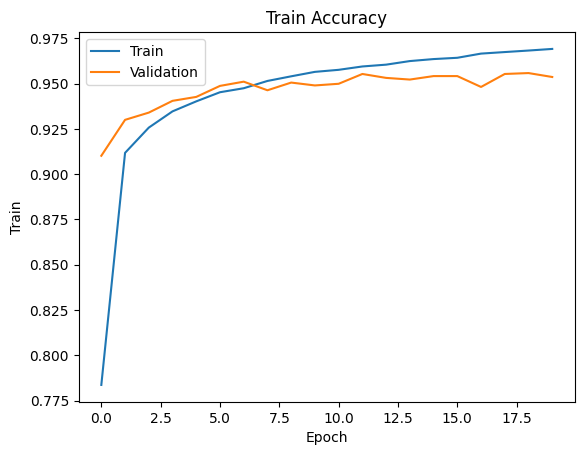

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train Accuracy')
plt.ylabel('Train')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

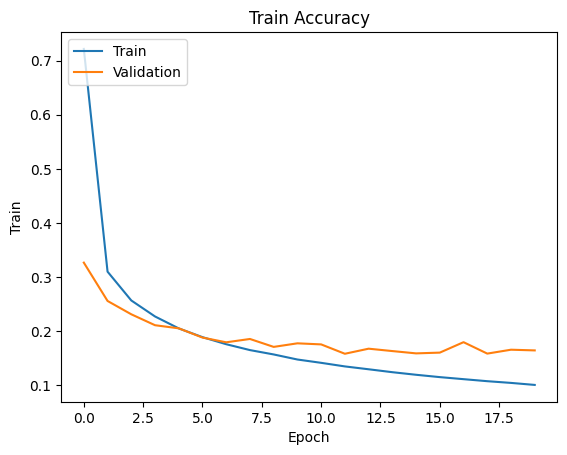

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Accuracy')
plt.ylabel('Train')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

評估模型成效及修正, 需要適用Test image

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test) # 使用測試樣本及其標籤來評估, 回傳loss及accuracy
print("測試資料(Test data) 準確率 :",  f"{100*test_acc:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9534 - loss: 0.1698
測試資料(Test data) 準確率 : 95.89%


用訓練好的模型==>去預測答案 model.predict(x_test)

In [ ]:

# predict = model.predict(x_test) # 利用predict() 回傳預測結果
# predict.round(0)  # 小數第一位, 4捨5入

import numpy as np
predict = np.argmax(model.predict(x_test), axis=1) # 回完預測數字, 10個元素中最大值所在位置
# the axis is to choose either columns axis=0   or   rows  axis=1.

print(predict)
print(test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


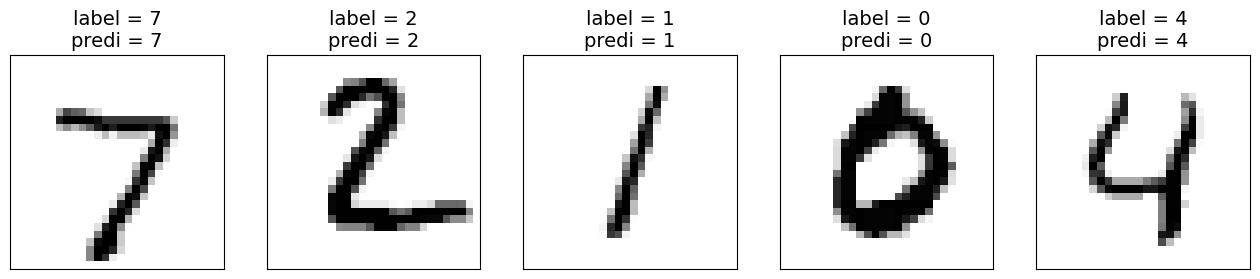

In [ ]:
# 畫出圖片並標示預測結果與標準答案

import numpy as np
predict = np.argmax(model.predict(x_test), axis=1) # 回完預測數字, 10個元素中最大值所在位置
# the axis is to choose either columns axis=0   or   rows  axis=1.

plt.gcf().set_size_inches(16,10)

for i in range(5):
    ax = plt.subplot(1, 5, 1+i)
    ax.imshow(test_images[i], cmap='binary')
    ax.set_title(       'label = ' + str(test_labels[i]) + \
                 '\n' + 'predi = ' + str(predict[i]), fontsize=14)
    ax.set_xticks([]); ax.set_yticks([])

plt.show()



In [ ]:
def test(img_idx=0):
  plt.imshow(test_images[img_idx].reshape(28,28), cmap='gray')
  plt.title( f'label: {test_labels[img_idx]}', fontsize=15 )
  plt.axis('off')
  plt.show()

interact_manual( test, img_idx = (0, 9999))

interactive(children=(IntSlider(value=0, description='img_idx', max=9999), Button(description='Run Interact', …

<function __main__.test(img_idx=0)>

模型的儲存及載入

In [ ]:
model.save('my_model.keras')

In [ ]:
# 由檔案載入並使用模型

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils    import to_categorical
from tensorflow.keras.models   import load_model

model = load_model('my_model.keras')

(_ , _), (test_images, test_labels) = mnist.load_data()

x_test = test_images.reshape(10000, 28*28) # 預處理測試樣本
x_test = x_test.astype('float32') / 255    # 預處理測試樣本
y_test = to_categorical( test_labels)      # 預處理測試標籤


test_loss, test_acc = model.evaluate(x_test, y_test)
print("測試資料準確度", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1698
測試資料準確度 0.958899974822998


In [ ]:
from PIL import Image
import numpy as np


In [ ]:
# 利用 gradio 產生一個手寫辨識數字的程式

def resize_image(inp):
  image = np.array(inp["layers"][0], dtype=np.float32)
  image = image.astype( np.uint8 )

  image_pil = Image.fromarray(image)

  background = Image.new("RGB", image_pil.size, (255, 255, 255))
  background.paste(image_pil, mask = image_pil.split()[3])
  image_pil = background

  img_gray = image_pil.convert('L')
  img_array = np.array(img_gray.resize((28,28), resample = Image.LANCZOS))

  img_array = 255 - img_array
  img_array   = img_array.reshape(1, 784) / 255.0

  return img_array


In [ ]:
def recognize_digit(inp):
  img_array = resize_image(inp)
  prediction = model.predict(img_array).flatten()
  labels = list('0123456789')
  return {labels[i]:float(prediction[i]) for i in range(10)}

In [ ]:
iface = gr.Interface(
    fn = recognize_digit,
    inputs  = gr.Sketchpad(),
    outputs = gr.Label(num_top_classes=3),
    title = "MNIST 手寫辨識",
    description = "請在畫板上繪製數字"
   )

iface.launch(share = True, debug=True)